# Unit 4 Assignment: A Whale Off the Port(folio)
## Jeff Myers

In [36]:
# Import libraries and dependencies

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [37]:
# Reading Whale Returns

whale_returns_path = Path("Resources/whale_returns.csv")

whale_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [38]:
# Count Nulls

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [39]:
# Dropping Nulls for Whale

whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [40]:
# Reading algorithmic returns

algo_returns_path = Path("Resources/algo_returns.csv")

algo_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [41]:
# Dropping Nulls for Algo

algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [42]:
# Reading S&P 500 Closing Prices

SP500_returns_path = Path("Resources/sp500_history.csv")

SP500_df = pd.read_csv(SP500_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sort Ascending Dates

SP500_df = SP500_df.sort_values(by='Date', ascending=True)
SP500_df.head()

,Close
Date,
2012-10-01,"$1,444.49"
2012-10-02,"$1,445.75"
2012-10-03,"$1,450.99"
2012-10-04,"$1,461.40"
2012-10-05,"$1,460.93"


In [43]:
# Check Data Types

SP500_df.dtypes

Close    object
dtype: object

In [44]:
# Remove dollar sign $

SP500_df['Close'] = SP500_df['Close'].str.replace(',', '')
SP500_df['Close'] = SP500_df['Close'].str.replace('$', '')

SP500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [45]:
# Fix Data Types

SP500_df['Close'] = SP500_df['Close'].astype('float')
SP500_df.dtypes

Close    float64
dtype: object

In [46]:
# Calculate Daily Returns

SP500_daily_returns = SP500_df.pct_change()
SP500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [47]:
# Drop Nulls for S&P500 Daily Returns
SP500_daily_returns.dropna(inplace=True)
SP500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [48]:
# Rename Column to S&P500
column = ["S&P500"]
SP500_daily_returns.columns = column
SP500_daily_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


 ### Combine Whale, Algorithmic, and S&P 500 Returns

In [49]:
# Concatenate all Data Frames into a single Dataframe

column_appended_data = pd.concat([whale_df, algo_df, SP500_daily_returns], axis="columns", join="inner")
column_appended_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


## Porfolio Analysis

### Performance

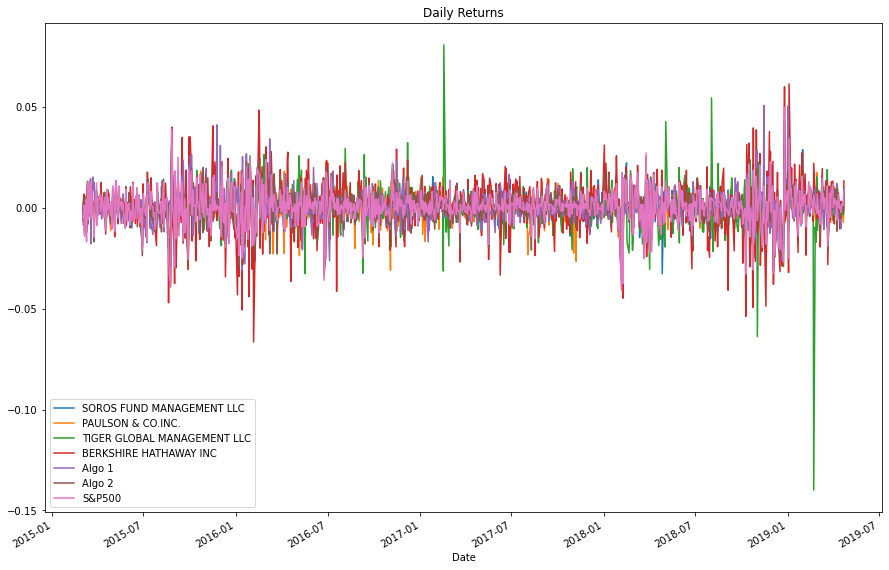

In [50]:
# Plot Portfolio Returns
portfolio_returns = column_appended_data

portfolio_returns.plot(figsize=(15,10), title="Daily Returns")

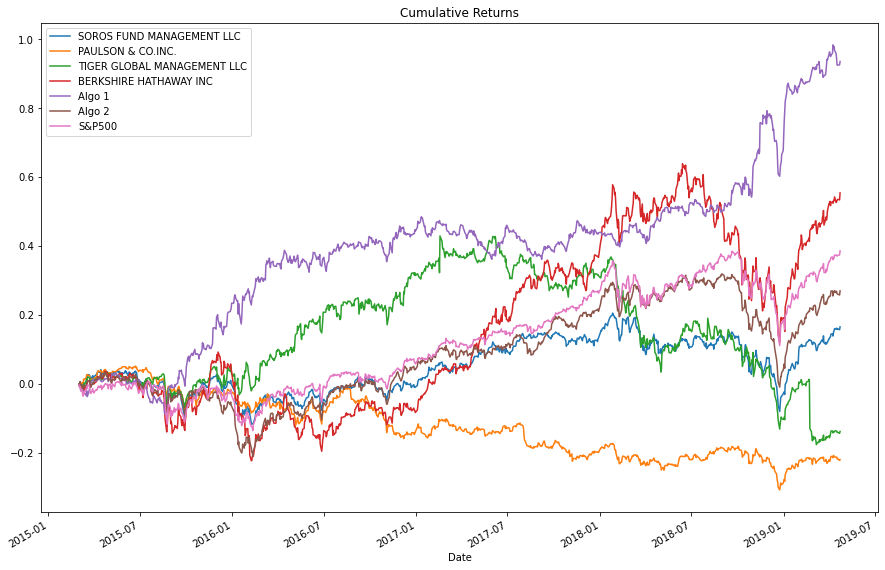

In [51]:
# Calculate cumulative Returns

cumulative_returns =(1 + portfolio_returns).cumprod() - 1

# Plot Cumulative Returns

cumulative_returns.plot(figsize=(15,10), title = "Cumulative Returns")

Based on the above analysis, one can conclude that both Algo 1 and Berkshire Hathaway out performed the market (S&P500).

## Risk

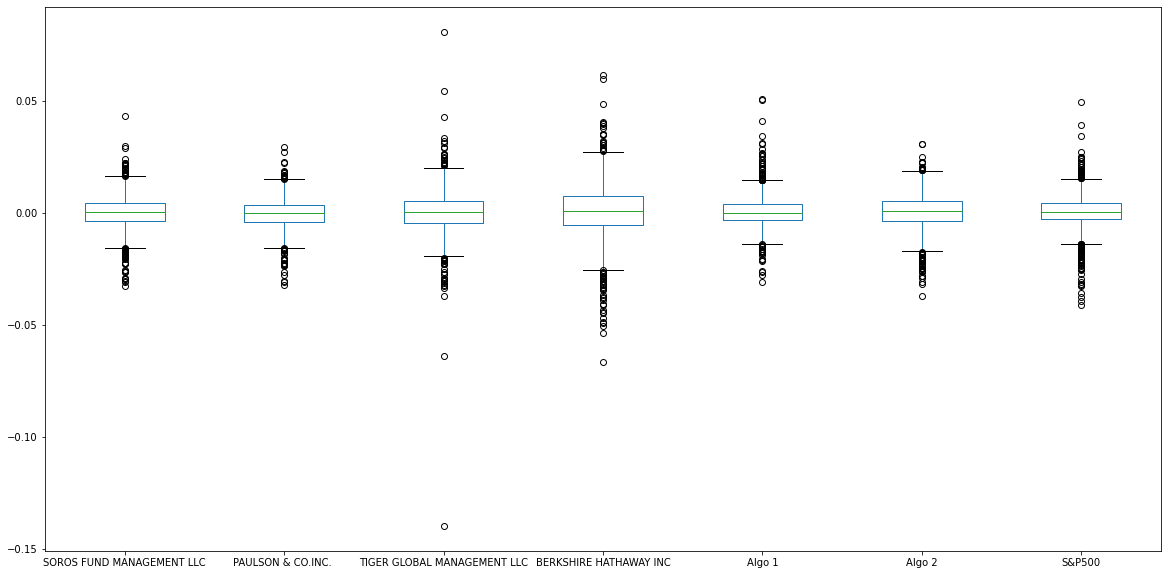

In [52]:
# Box Plot

portfolio_returns.boxplot(figsize=(20,10), grid=False)

The above box plot indicates that Tiger Global has the largest spread and Paulson & Co. Inc. has the smallest spread.

In [53]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 

all_portfolio_std = portfolio_returns.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

In [54]:
# Determine which portfolios are riskier than the S&P 500

portfolio_returns.std()>0.008554


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

In [55]:
# Calculate the annualized standard deviation

annualized_std_deviation = all_portfolio_std * np.sqrt(252)
annualized_std_deviation

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

### Rolling Statistics

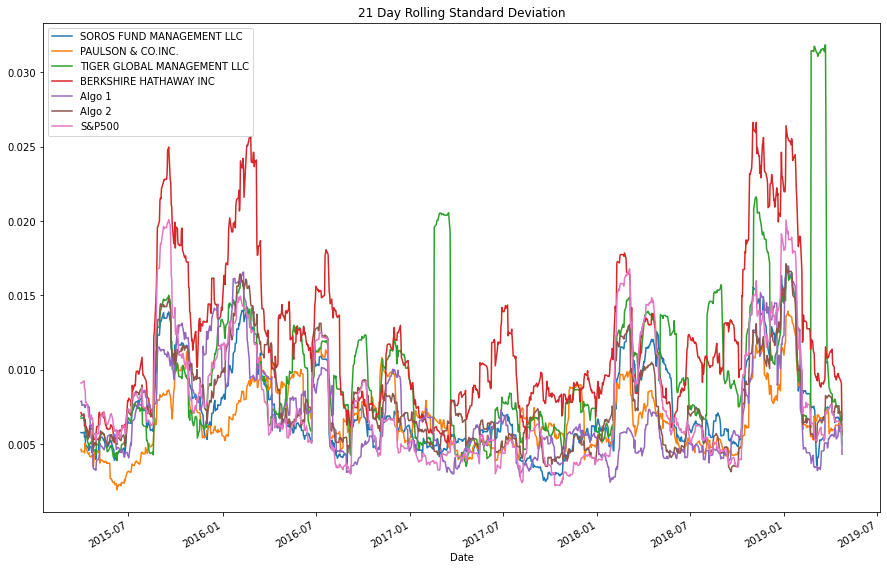

In [56]:
# Calculate and plot the rolling standard deviation for 
# the various porfolios using a 21 day trading window

portfolio_returns.rolling(window=21).std().plot(figsize=(15,10), title = "21 Day Rolling Standard Deviation")



Based on the 21 day rolling standard deviation most of the portfolios stay fairly consistent with the volatility in standard deviations compared to the S&P. There are two outliers that seem to be more volatile, they are Tiger and Berkshire Hathaway.

In [57]:
# Construct a correlation table

correlation = portfolio_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In regards to the S&P500 and the correlation table, the Soros Fund and Algo 2 are mostly correlated to the S&P500.

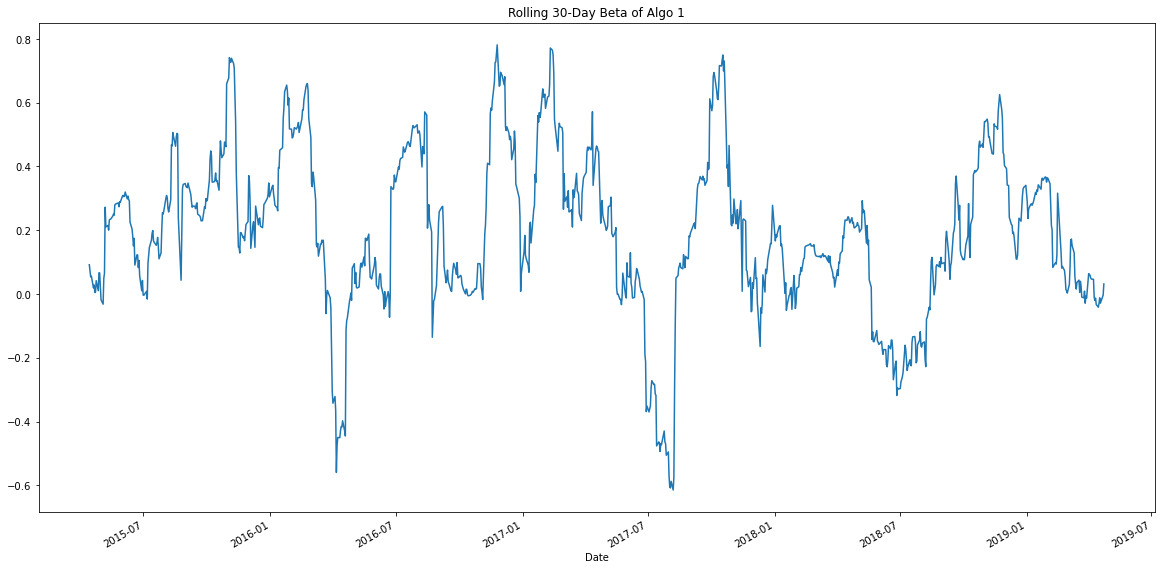

In [58]:
#Calculate Rolling 30 day Beta of Algo 1 Against S&P500

# Calculate 30-day rolling covariance of Algo 1 vs S&P500
rolling_algoone_covariance = column_appended_data['Algo 1'].rolling(window=30).cov(column_appended_data['S&P500'])

# Calculate 30-day rolling variance of S&P500
rolling_variance_sp500 = column_appended_data['S&P500'].rolling(window=30).var()

# Calculate 30-day rolling beta of Algo 1 and plot the data
rolling_algoone_beta = rolling_algoone_covariance / rolling_variance_sp500

#Plot Beta
rolling_algoone_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Algo 1')

Analyzing this chart, indicates that Algo 1 is sensitive to the S&P500, indicated by the peaks and troughs.

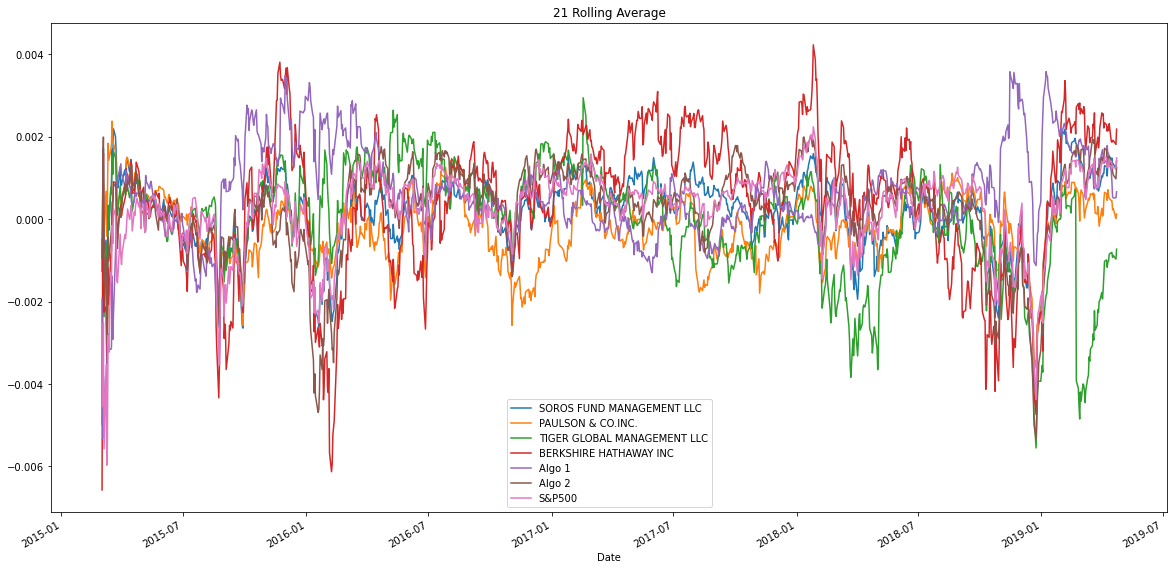

In [59]:
# Calculate a rolling window using the exponentially weighted moving average



portfolio_returns_ewa_21 = portfolio_returns.ewm(halflife=21).mean()
portfolio_returns_ewa_21.plot(figsize=(20, 10), title='21 Rolling Average')

### Sharpe Ratios

In [60]:
sharpe_ratios = (portfolio_returns.mean()*252) / (portfolio_returns.std()* np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378649
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

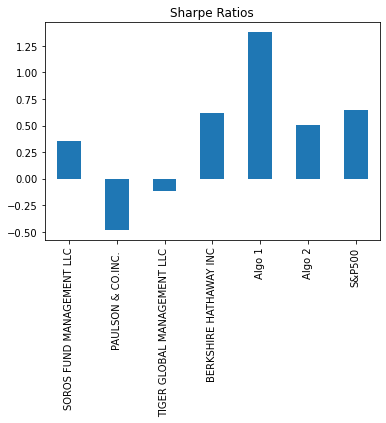

In [61]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot.bar(title="Sharpe Ratios")

Using the Sharpe Ratio, one can conclude that Algo 1 could outperform the S&P 500 and Algo 2 will unlikely outperform the S&P 500.

### Portfolio Returns

In [62]:
#read and preview returns for Etsy

etsy_prices_path = Path("Resources/etsy_prices.csv")

etsy_df = pd.read_csv(etsy_prices_path, index_col="Trade Date", parse_dates=True, infer_datetime_format=True)
etsy_df.head()

,Symbol,Close
Trade Date,,
2019-01-02,ETSY,47.00
2019-01-03,ETSY,46.03
2019-01-04,ETSY,49.70
2019-01-07,ETSY,51.57
2019-01-08,ETSY,53.88


In [63]:
#read and preview returns for Goldman Sachs

gs_prices_path = Path("Resources/gs_prices.csv")

gs_df = pd.read_csv(gs_prices_path, index_col="Trade Date", parse_dates=True, infer_datetime_format=True)
gs_df.head()

,Symbol,Close
Trade Date,,
2019-01-02,GS,172.03
2019-01-03,GS,169.51
2019-01-04,GS,175.05
2019-01-07,GS,176.02
2019-01-08,GS,175.37


In [64]:
#read and preview returns for Snap

snap_prices_path = Path("Resources/snap_prices.csv")

snap_df = pd.read_csv(snap_prices_path, index_col="Trade Date", parse_dates=True, infer_datetime_format=True)
snap_df.head()

,Symbol,Close
Trade Date,,
2019-01-02,SNAP,5.79
2019-01-03,SNAP,5.68
2019-01-04,SNAP,5.95
2019-01-07,SNAP,6.21
2019-01-08,SNAP,6.40


In [65]:
# Concatenate all stocks into a single DataFrame

all_stock_df = pd.concat([etsy_df, gs_df, snap_df], axis="rows", join="inner")
all_stock_df.head()

,Symbol,Close
Trade Date,,
2019-01-02,ETSY,47.00
2019-01-03,ETSY,46.03
2019-01-04,ETSY,49.70
2019-01-07,ETSY,51.57
2019-01-08,ETSY,53.88


In [66]:
# Reset the index
all_stock_df = all_stock_df.reset_index()
# all_stock_df.set_index('Trade Date')
# print(all_stock_df.index.name)

In [67]:
# Pivot so that each column of prices represents a unique symbol
all_stock_pivot = all_stock_df.pivot(index = 'Trade Date', columns='Symbol', values='Close')
all_stock_pivot

Symbol,ETSY,GS,SNAP
Trade Date,,,
2019-01-02,47.00,172.03,5.79
2019-01-03,46.03,169.51,5.68
2019-01-04,49.70,175.05,5.95
2019-01-07,51.57,176.02,6.21
2019-01-08,53.88,175.37,6.40
...,...,...,...
2020-05-22,77.48,179.93,17.67
2020-05-26,74.08,196.06,17.41
2020-05-27,76.24,209.66,17.00


In [68]:
#Calculate Returns
all_stock_daily_returns = all_stock_pivot.pct_change()
all_stock_daily_returns.head()

Symbol,ETSY,GS,SNAP
Trade Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.020638,-0.014649,-0.018998
2019-01-04,0.079731,0.032682,0.047535
2019-01-07,0.037626,0.005541,0.043697
2019-01-08,0.044793,-0.003693,0.030596


In [69]:
#Drop Nulls
all_stock_daily_returns.dropna(inplace=True)
all_stock_daily_returns.head()

Symbol,ETSY,GS,SNAP
Trade Date,,,
2019-01-03,-0.020638,-0.014649,-0.018998
2019-01-04,0.079731,0.032682,0.047535
2019-01-07,0.037626,0.005541,0.043697
2019-01-08,0.044793,-0.003693,0.030596
2019-01-09,-0.020601,0.006272,-0.018750


In [70]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_return = all_stock_daily_returns.dot(weights)
weighted_return.head()

Trade Date
2019-01-03   -0.018095
2019-01-04    0.053316
2019-01-07    0.028955
2019-01-08    0.023899
2019-01-09   -0.011026
dtype: float64

In [71]:
#concat porfolio
combined_portfolio = pd.concat([portfolio_returns, weighted_return], axis="columns", join="inner")
combined_portfolio = combined_portfolio.rename(columns={0:'Custom'})

combined_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757,-0.018095
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336,0.053316
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010,0.028955
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695,0.023899
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.004098,-0.011026


In [72]:
combined_portfolio.dropna(inplace=True)
combined_portfolio.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.000880
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.001510
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.009870
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.005541
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.021524


In [73]:
#Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [74]:
combined_portfolio_std = combined_portfolio.std()
combined_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007471
PAULSON & CO.INC.              0.006958
TIGER GLOBAL MANAGEMENT LLC    0.018262
BERKSHIRE HATHAWAY INC         0.012868
Algo 1                         0.005730
Algo 2                         0.007657
S&P500                         0.007886
Custom                         0.018313
dtype: float64

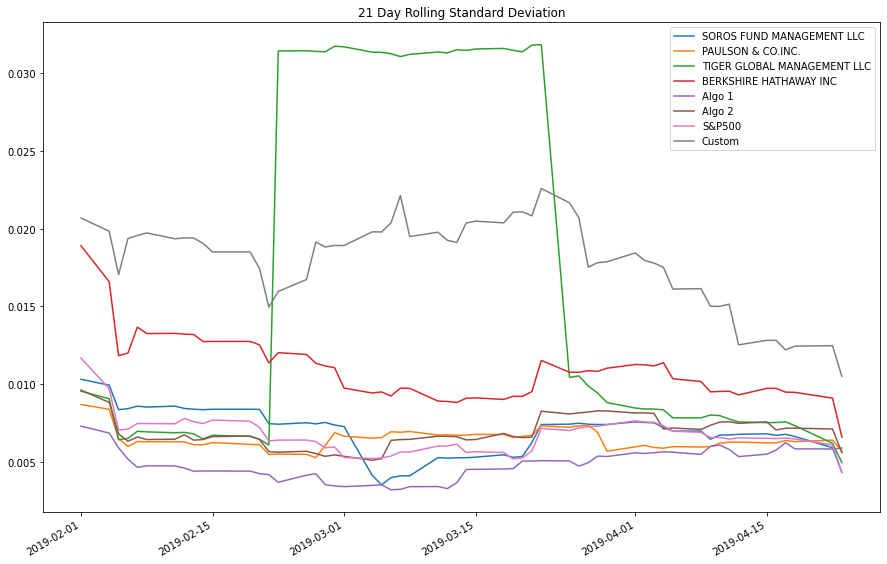

In [75]:
#Rolling 21 Day Standard Deviation on Combined Portfolio
combined_portfolio.rolling(window=21).std().plot(figsize=(15,10), title = "21 Day Rolling Standard Deviation")

In [76]:
# Annualized Sharpe Ratios

sharpe_ratios_combined = (combined_portfolio.mean()*252) / (combined_portfolio.std()* np.sqrt(252))
sharpe_ratios_combined

SOROS FUND MANAGEMENT LLC      4.998934
PAULSON & CO.INC.              2.364249
TIGER GLOBAL MANAGEMENT LLC   -0.384135
BERKSHIRE HATHAWAY INC         4.442098
Algo 1                         3.488491
Algo 2                         5.051608
S&P500                         4.196678
Custom                         5.082076
dtype: float64

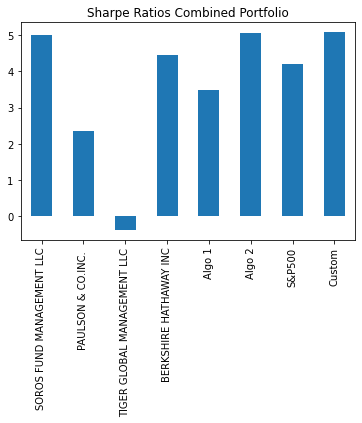

In [77]:
#Sharpe Ratio Plot
sharpe_ratios_combined.plot.bar(title="Sharpe Ratios Combined Portfolio")

In [78]:
# Correlation Analysis for Combined Portfolio

correlation_combined = combined_portfolio.corr()
correlation_combined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.749951,0.356923,0.741391,0.091970,0.807262,0.789750,0.456158
PAULSON & CO.INC.,0.749951,1.000000,0.268720,0.618347,0.147312,0.737247,0.699920,0.443799
TIGER GLOBAL MANAGEMENT LLC,0.356923,0.268720,1.000000,0.135657,0.022687,0.198111,0.248452,-0.043567
BERKSHIRE HATHAWAY INC,0.741391,0.618347,0.135657,1.000000,0.166761,0.779560,0.872547,0.573735
Algo 1,0.091970,0.147312,0.022687,0.166761,1.000000,0.118447,0.125967,0.130168
Algo 2,0.807262,0.737247,0.198111,0.779560,0.118447,1.000000,0.877848,0.579767
S&P500,0.789750,0.699920,0.248452,0.872547,0.125967,0.877848,1.000000,0.607431
Custom,0.456158,0.443799,-0.043567,0.573735,0.130168,0.579767,0.607431,1.000000


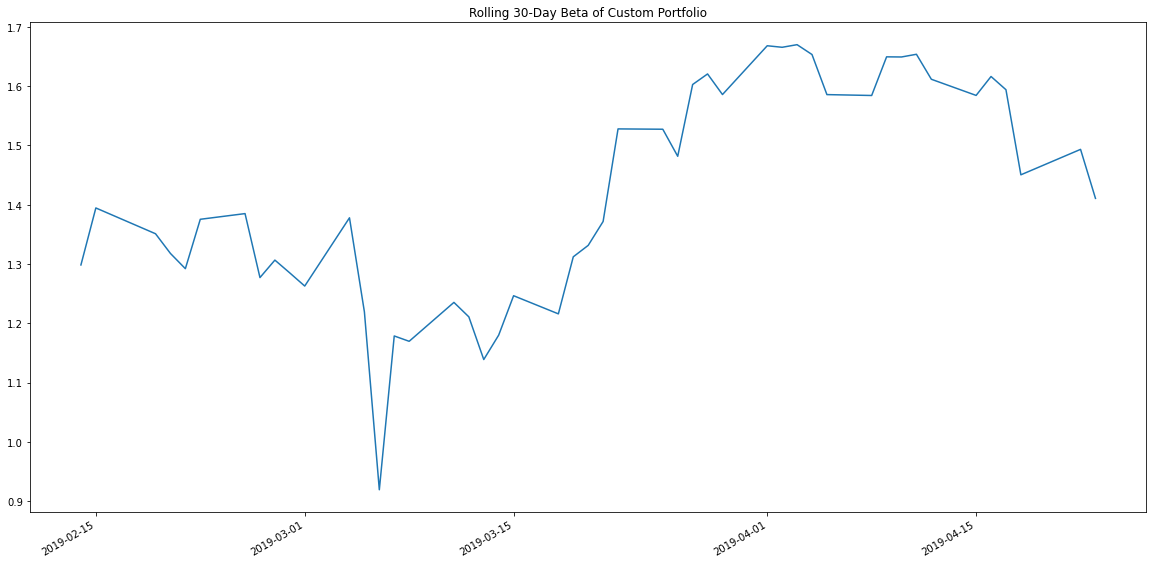

In [79]:
#Calculate Rolling 30 day Beta of Custom Portfolio Against S&P500

# Calculate 30-day rolling covariance of Custom vs S&P500
rolling_custom_covariance = combined_portfolio['Custom'].rolling(window=30).cov(combined_portfolio['S&P500'])

# Calculate 30-day rolling variance of S&P500
rolling_variance_SP500 = combined_portfolio['S&P500'].rolling(window=30).var()

# Calculate 30-day rolling beta of Custom and plot the data
rolling_custom_beta = rolling_custom_covariance / rolling_variance_SP500

#Plot Beta
rolling_custom_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Custom Portfolio')
